<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall
**Impact on Food Delivery**


_Prepared by: Timothy Chan, 17 Feb 2023_

## Contents:
- [Background](#Background)
- [Data Import and Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Data-Visualization)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

--- 
## Background
--- 

### Problem Statement

Food delivery is affected by rainy weather in Singapore. Rain, especially heavy rain, may affect food deliveries in terms of surge in orders, less delivery riders and delays in deliveries. This project aims to analyse the weather patterns in Singapore to identify what strategies food delivery companies can adopt to better manage the rainy weather.

**How rain affects food delivery**

Rain may affect food deliveries in a few ways:
* Higher number of orders due to inconvenience of eating outside when it rains
* Less delivery riders, especially those using bicycles, scooters or motocycles when the rain is heavy
* Longer delivery time as delivery riders may need to wait for the rain to slow down, put on their rain gear or ride safely or detour to use sheltered routes

The surge in demand, decrease in delivery riders and longer delivery times may mean long delays. This means that Delivery Service providers should set realistic expectations on delivery timings if it rains. They could also control demand of orders and supply of delivery riders during the rainy seasons to meet the demand, by adjusting peak charges during rainy periods. They might not need to have as much marketing initiatives during the rainy seasons if they expect that riders will not be able to meet demand on rainy days.

Sources:<br>
[Today 6 Jan 2018: The perks and perils of being a food delivery rider](https://www.todayonline.com/singapore/perks-and-perils-being-food-delivery-rider)<br>
[The Straits Times  25 Jan 2023: Heavy rain disrupts Chinese New Year celebrations](https://www.straitstimes.com/singapore/heavy-rain-disrupts-chinese-new-year-celebrations)

**Rainfall in Singapore**

According to the [Meteorological Services Singapore (MSS)](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The Northeast Monsoon occurs from December to early March, and the Southwest Monsoon from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:
* Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;
* Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;
* Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

### Data Chosen

Datasets provided corresponding to rainfall information are: 
* [`rainfall-monthly-highest-daily-total.csv`](./data/rainfall-monthly-highest-daily-total.csv): The highest daily total rainfall for the month recorded in millimeters(mm) from 1982 to 2022.
* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in millimeters(mm) from 1982 to 2022 <br>
Rainfall information are collected at Changi Climate Station, Singapore. Files are extracted from [data.gov.sg](https://data.gov.sg/).

Additionally, the following datasets are used:
* [`population_by_planning_area_2022.csv`](./data/population_by_planning_area_2022.csv): Population by planning area based on the Urban Redevelopment Authority (URA) Master Plan 2019. Relevant information is the Singapore Residents population by planning area as at June 2022. Extracted from [Singstat](https://www.singstat.gov.sg/find-data/search-by-theme/population/geographic-distribution/latest-data) at this [link](https://www.singstat.gov.sg/-/media/files/find_data/population/statistical_tables/respopagesexfa2022.ashx)
* [`historical daily records of rainfall`](./data/additional_rainfall_data): Relevant information are daily total rainfall, highest rainfall over 30min, 60min and 120 min, all recorded in millimeters(mm). Records from 6 different stations in different areas of Singapore for 2021 and 2022 were extracted from [Meteorological Service Singapore](http://www.weather.gov.sg/climate-historical-daily/)

All links above and within are functioning as of Feb 2023. All datasets are included in the [`data`](./data/) folder.

#### Data Dictionary of cleaned data

|Feature|Type|Dataset|Description|
|:---|:---|:---|:---|
|yyyy_mm|string|data_2013_2022|Year and month of rainfall information|
|maximum_rainfall_in_a_day|float|data_2013_2022|Highest daily total rainfall for the month recorded in millimeters(mm) from 2013 to 2022|
|no_of_rainy_days|integer|data_2013_2022|Monthly number of rain days from 2013 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.|
|total_rainfall|float|data_2013_2022|Monthly total rain recorded in millimeters(mm) from 2013 to 2022|
|year|integer|data_2013_2022|Year of rainfall information|
|month|integer|data_2013_2022|Month of rainfall information|
|station|string|stations_daily_2021_2022|Station and area of rainfall information|
|year|integer|stations_daily_2021_2022|Year of rainfall information|
|month|integer|stations_daily_2021_2022|Month of rainfall information|
|day|integer|stations_daily_2021_2022|Day of the month of rainfall information|
|daily_total_rainfall|float|stations_daily_2021_2022|Daily total rain recorded in millimeters(mm) from 2021 to 2022|
|highest_30min_rainfall|float|stations_daily_2021_2022|Highest rainfall over 30 minutes collected for the day from 2021 to 2022|
|highest_60min_rainfall|float|stations_daily_2021_2022|Highest rainfall over 60 minutes collected for the day from 2021 to 2022|
|highest_120min_rainfall|float|stations_daily_2021_2022|Highest rainfall over 120 minutes collected for the day from 2021 to 2022|
|days_of_heavy_rain|integer|stations_daily_2021_2022|Days with heavy rain from 2021 to 2022. Days with heavy rain = 1 and days with no heavy rain = 0. A day is considered to have heavy rain when there is more than 3.8mm of rain over 30 minutes for that day.|
|planning_area|string|population_by_planning_area|Selected population area based on the Urban Redevelopment Authority (URA) Master Plan 2019|
|population|integer|population_by_planning_area|Population of residents as of June 2022|

#### Coding Challenges

In [1]:
#1. Manually calculate mean:

def calc_mean(numbers):
    return sum([number for number in numbers])/len(numbers)

In [2]:
#2. Manually calculate standard deviation:

def calc_stddev(numbers):
    return (sum([(number - calc_mean(numbers))**2 for number in numbers])/len(numbers))**0.5     

--- 
## Data Import and Cleaning
--- 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import data
highest_daily = pd.read_csv("data/rainfall_monthly_highest_daily_total.csv")
days_rained = pd.read_csv("data/rainfall_monthly_number_of_rain_days.csv")
total_rain = pd.read_csv("data/rainfall_monthly_total.csv")

pop_area = pd.read_csv("data/population_by_planning_area_2022.csv")

### Provided rainfall data

In [5]:
# Merge datasets
monthly_data = pd.merge(highest_daily, days_rained, on='month')
monthly_data = pd.merge(monthly_data, total_rain, on='month')

In [6]:
# Print first five rows
monthly_data.head()

,month,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall
0,1982-01,36.5,10,107.1
1,1982-02,9.4,5,27.8
2,1982-03,61.7,11,160.8
3,1982-04,45.1,14,157.0
4,1982-05,33.0,10,102.2


In [7]:
# Check for null values and abnormal data types
monthly_data.info()

# Noted no missing values or abnormal data types. Checked that columns are appropriately named.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 491
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      492 non-null    object 
 1   maximum_rainfall_in_a_day  492 non-null    float64
 2   no_of_rainy_days           492 non-null    int64  
 3   total_rainfall             492 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 19.2+ KB


In [8]:
# Create column for year and month, changing their types to integers
# Rename year-month column for better description and consistency
monthly_data.rename(columns={'month': 'yyyy_mm'},inplace=True)
monthly_data['year'] = monthly_data['yyyy_mm'].str.split('-').str[0].apply(int)
monthly_data['month'] = monthly_data['yyyy_mm'].str.split('-').str[-1].apply(int)
monthly_data.head()

,yyyy_mm,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,year,month
0,1982-01,36.5,10,107.1,1982,1
1,1982-02,9.4,5,27.8,1982,2
2,1982-03,61.7,11,160.8,1982,3
3,1982-04,45.1,14,157.0,1982,4
4,1982-05,33.0,10,102.2,1982,5


In [9]:
# Check that year and month are integers
monthly_data.dtypes

yyyy_mm                       object
maximum_rainfall_in_a_day    float64
no_of_rainy_days               int64
total_rainfall               float64
year                           int64
month                          int64
dtype: object

Only the recent 10 years of rainfall data (2013 to 2022) will be used for exploration and analysis.

In [10]:
# Filter for recent 10 years only. Assign to new df to be used
data_2013_2022 = monthly_data[monthly_data['year'] >= 2013]
data_2013_2022.head()

,yyyy_mm,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,year,month
372,2013-01,73.0,15,262.0,2013,1
373,2013-02,95.2,22,395.2,2013,2
374,2013-03,29.6,10,85.8,2013,3
375,2013-04,41.6,19,159.4,2013,4
376,2013-05,46.2,17,211.4,2013,5


--- 
### Additional population data

In [11]:
pop_area.head()

,PA,SZ,AG,Sex,FA,Pop,Time
0,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,<= 60,0,2022
1,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,>60 to 80,10,2022
2,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,>80 to 100,20,2022
3,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,>100 to 120,60,2022
4,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,>120,10,2022


In [12]:
pop_area.info()

# Datatypes are as expected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75696 entries, 0 to 75695
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PA      75696 non-null  object
 1   SZ      75696 non-null  object
 2   AG      75696 non-null  object
 3   Sex     75696 non-null  object
 4   FA      75696 non-null  object
 5   Pop     75696 non-null  int64 
 6   Time    75696 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 4.0+ MB


In [13]:
# New dataframe after group by population area and aggregate population, and sorting by population size
population_by_planning_area = pop_area.groupby('PA')['Pop'].sum().sort_values(ascending=False).reset_index()

In [14]:
# Map replacement station names
new_columns_dict_pop = {
    'PA': 'planning_area',
    'Pop': 'population'
}

# Rename columns for better description and consistency
population_by_planning_area.rename(columns=new_columns_dict_pop, inplace=True)

In [15]:
# Find the 10 areas with the highest population
population_by_planning_area.head(10)

,planning_area,population
0,Bedok,278870
1,Tampines,265610
2,Jurong West,258520
3,Sengkang,253050
4,Woodlands,252720
5,Hougang,227720
6,Yishun,222770
7,Choa Chu Kang,190460
8,Punggol,186250
9,Bukit Batok,165310


*Selecting additional stations*

Identified which regions have the largest residential populations in Singapore. Selected records of rainfall stations (with available data) across Singapore within proximity of these areas with the largest populations. Also included one station in proximity of the Central Business District (CBD). Larger residential areas and the business district are likely to have more food delivery orders.

|Geographic location|Rainfall station in proximity chosen|Residential population area|
|:---|:---|:---|
|East|Simei|Bedok,Tampines|
|North|Sembawang|Woodlands, Yishun|
|North-East|Punggol|Sengkang, Hougang, Punggol |
|North-West|Chua Chu Kang Central|Choa Chu Kang|
|West|Jurong West|Jurong West, Bukit Batok|
|South|Marina Barrage|CBD|

--- 
### Additional rainfall data

1) Extract additional rainfall information from six selected rainfall stations. Only extracted for the recent years 2021 and 2022 because of missing or inconsistent data for earlier years:
* broken links/files for some stations for some months
* more missing/unrecorded data which affects comparability across months or areas
* inconsistent formatting which require extensive cleaning up

2) Clean up of '-' or space where columns should be float. Noted that missing data after cleaning is small, at only 0.7% of total number of rows

3) Include additional column to indicate the number of days with heavy rain. According to [American Meteorological Society](https://glossary.ametsoc.org/wiki/Rain), heavy rain is defined as over 0.76 cm (7.6 mm) per hour.

As food delivery timing is important, we assume that even 30 min of heavy rain will have an impact to delays. Thus, we will consider a day to have heavy rain when there is more than 3.8mm of rain over 30 min for that day (7.6 mm per hour).

In [16]:
# Noted this could be done automatically using a script, but for project purpose printed the links instead.

# Map stations to their respective codes used in download link
weather_stations = {
    'Simei': 'S84',
    'Jurong West': 'S44',
    'Punggol': 'S81',
    'Chua Chu Kang': 'S114',
    'Sembawang': 'S80',
    'Marina Barrage': 'S108'
}

# Loop over the code, month and year to print relevant links
for location, code in weather_stations.items():
    for month in range(1, 13):
        for year in range(2021,2023):
            link = f"http://www.weather.gov.sg/files/dailydata/DAILYDATA_{code}_{year}{month:02d}.csv"
            print(f"Download link for {location} ({code}) for {month:02d}/{year}: {link}")

Download link for Simei (S84) for 01/2021: http://www.weather.gov.sg/files/dailydata/DAILYDATA_S84_202101.csv
Download link for Simei (S84) for 01/2022: http://www.weather.gov.sg/files/dailydata/DAILYDATA_S84_202201.csv
Download link for Simei (S84) for 02/2021: http://www.weather.gov.sg/files/dailydata/DAILYDATA_S84_202102.csv
Download link for Simei (S84) for 02/2022: http://www.weather.gov.sg/files/dailydata/DAILYDATA_S84_202202.csv
Download link for Simei (S84) for 03/2021: http://www.weather.gov.sg/files/dailydata/DAILYDATA_S84_202103.csv
Download link for Simei (S84) for 03/2022: http://www.weather.gov.sg/files/dailydata/DAILYDATA_S84_202203.csv
Download link for Simei (S84) for 04/2021: http://www.weather.gov.sg/files/dailydata/DAILYDATA_S84_202104.csv
Download link for Simei (S84) for 04/2022: http://www.weather.gov.sg/files/dailydata/DAILYDATA_S84_202204.csv
Download link for Simei (S84) for 05/2021: http://www.weather.gov.sg/files/dailydata/DAILYDATA_S84_202105.csv
Download l

In [17]:
# Create an empty list to store the dataframes
dfs = []

# Loop over the CSV files for the specified weather station, year and month
for location, code in weather_stations.items():
    for year in range(2021,2023):
        for month in range(1, 13):
            filename = f"data/additional_rainfall_data/{code}_{year}{month:02d}.csv"
            df = pd.read_csv(filename)
            dfs.append(df)

# Concatenate the dataframes into a single dataframe
stations_daily_2021_2022 = pd.concat(dfs)

In [18]:
# Drop unnecessary columns
stations_daily_2021_2022 = stations_daily_2021_2022.iloc[:,:8]

# Rename columns for better formatting
new_columns_dict = {
    'Station': 'station',
    'Year': 'year',
    'Month': 'month',
    'Day': 'day',
    'Daily Rainfall Total (mm)': 'daily_total_rainfall',
    'Highest 30 min Rainfall (mm)': 'highest_30min_rainfall',
    'Highest 60 min Rainfall (mm)': 'highest_60min_rainfall',
    'Highest 120 min Rainfall (mm)': 'highest_120min_rainfall',
}

stations_daily_2021_2022.rename(columns=new_columns_dict, inplace=True)

In [19]:
stations_daily_2021_2022.info()

# Noted rainfall columns are string instead of float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4380 entries, 0 to 30
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   station                  4380 non-null   object
 1   year                     4380 non-null   int64 
 2   month                    4380 non-null   int64 
 3   day                      4380 non-null   int64 
 4   daily_total_rainfall     4380 non-null   object
 5   highest_30min_rainfall   4380 non-null   object
 6   highest_60min_rainfall   4380 non-null   object
 7   highest_120min_rainfall  4380 non-null   object
dtypes: int64(3), object(5)
memory usage: 308.0+ KB


In [20]:
# Remove '-' or space so that rainfall columns are float

columns_to_convert = ['daily_total_rainfall', 'highest_30min_rainfall', 'highest_60min_rainfall', 'highest_120min_rainfall']

for col in columns_to_convert:
    stations_daily_2021_2022[col] = stations_daily_2021_2022[col].map(lambda x: float('nan') if x in ('-',' ','') else float(x))

stations_daily_2021_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4380 entries, 0 to 30
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   station                  4380 non-null   object 
 1   year                     4380 non-null   int64  
 2   month                    4380 non-null   int64  
 3   day                      4380 non-null   int64  
 4   daily_total_rainfall     4354 non-null   float64
 5   highest_30min_rainfall   4349 non-null   float64
 6   highest_60min_rainfall   4349 non-null   float64
 7   highest_120min_rainfall  4349 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 308.0+ KB


In [21]:
# Check for missing data. Noted that missing data is small, at only 0.7% of total number of rows
stations_daily_2021_2022.isna().sum()

station                     0
year                        0
month                       0
day                         0
daily_total_rainfall       26
highest_30min_rainfall     31
highest_60min_rainfall     31
highest_120min_rainfall    31
dtype: int64

In [22]:
# Map replacement station names
new_station_names = {
    'Choa Chu Kang (Central)': 'Choa Chu Kang (North-West)',
    'Jurong (West)': 'Jurong (West)',
    'Marina Barrage': 'Marina Barrage (CBD)',
    'Punggol': 'Punggol (North-East)',
    'Sembawang': 'Sembawang (North)',
    'Simei': 'Simei (East)'
}

# Replace the station names for better description and consistency
stations_daily_2021_2022['station'] = stations_daily_2021_2022['station'].replace(new_station_names)

In [23]:
# Include columns indicating "1" if there was heavy rain that day

stations_daily_2021_2022['days_of_heavy_rain'] = stations_daily_2021_2022['highest_30min_rainfall'].map(lambda x: 1 if x > 3.8 else 0)

In [24]:
stations_daily_2021_2022.head()

,station,year,month,day,daily_total_rainfall,highest_30min_rainfall,highest_60min_rainfall,highest_120min_rainfall,days_of_heavy_rain
0,Simei (East),2021,1,1,138.2,17.8,33.0,56.4,1
1,Simei (East),2021,1,2,182.6,20.6,36.8,58.4,1
2,Simei (East),2021,1,3,6.6,1.8,2.6,3.6,0
3,Simei (East),2021,1,4,0.0,0.0,0.0,0.0,0
4,Simei (East),2021,1,5,0.8,0.8,0.8,0.8,0


In [25]:
# Save cleaned data to cleaned folder
data_2013_2022.to_csv('data/cleaned/data_2013_2022_cleaned.csv', index=False)
population_by_planning_area.to_csv('data/cleaned/population_by_planning_area_cleaned.csv', index=False)
stations_daily_2021_2022.to_csv('data/cleaned/stations_daily_2021_2022_cleaned.csv', index=False)

--- 
## Exploratory Data Analysis
--- 

### Provided rainfall data

In [26]:
# Summary statistics using describe
data_2013_2022.describe()

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,year,month
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,43.636667,14.533333,162.785833,2017.500000,6.500000
std,27.250102,5.638901,101.293556,2.884324,3.466527
min,0.200000,1.000000,0.200000,2013.000000,1.000000
25%,29.000000,10.000000,88.850000,2015.000000,3.750000
50%,39.200000,15.000000,146.900000,2017.500000,6.500000
75%,53.200000,19.000000,212.700000,2020.000000,9.250000
max,210.600000,27.000000,692.800000,2022.000000,12.000000


Noted that the it rained for **15 days in a month on average**, and up to 27 days a month. Standard deviation is 5.6 days.

In [27]:
# Standard deviation of rainfall columns using earlier function
sd = {column: round(calc_stddev(data_2013_2022[column]),2) for column in ['maximum_rainfall_in_a_day', 'no_of_rainy_days', 'total_rainfall']}
sd

{'maximum_rainfall_in_a_day': 27.14,
 'no_of_rainy_days': 5.62,
 'total_rainfall': 100.87}

In [28]:
# Mean of rainfall columns using earlier function
mean = {column: round(calc_mean(data_2013_2022[column]),2) for column in ['maximum_rainfall_in_a_day', 'no_of_rainy_days', 'total_rainfall']}
mean

{'maximum_rainfall_in_a_day': 43.64,
 'no_of_rainy_days': 14.53,
 'total_rainfall': 162.79}

In [29]:
# Function to find the month with maximum or minimum rainfall or days rained for the specified year 

years = [1990, 2000, 2010, 2020]

def get_monthly(years, get_column, min_or_max):
    result = pd.DataFrame(columns=['year', 'yyyy_mm', get_column])
    for year in years:
        if min_or_max == 'min':
            filter_row = monthly_data.loc[monthly_data['year']==year].sort_values(get_column).head(1)
        else:
            filter_row = monthly_data.loc[monthly_data['year']==year].sort_values(get_column).tail(1)            
        result = pd.concat([result, filter_row[['year', 'yyyy_mm', get_column]]])
    result.columns = ['year', 'yyyy_mm', min_or_max + '_' + get_column]
    return result

In [30]:
# Qn: Which month have the highest total rainfall in 1990, 2000, 2010 and 2020?
get_column = 'total_rainfall'
min_or_max = 'max'
get_monthly(years, get_column, min_or_max)

,year,yyyy_mm,max_total_rainfall
104,1990,1990-09,204.5
226,2000,2000-11,385.7
342,2010,2010-07,298.5
460,2020,2020-05,255.6


In [31]:
# Qn: Which month have the lowest total rainfall in 1990, 2000, 2010 and 2020?
get_column = 'total_rainfall'
min_or_max = 'min'
get_monthly(years, get_column, min_or_max)

,year,yyyy_mm,min_total_rainfall
97,1990,1990-02,24.1
224,2000,2000-09,81.1
337,2010,2010-02,6.3
457,2020,2020-02,65.0


In [32]:
# Qn: Which year has the highest total rainfall in the between 2013 and 2022?
data_2013_2022.groupby('year')['total_rainfall'].sum().sort_values().tail(1)         

year
2021    2809.6
Name: total_rainfall, dtype: float64

In [33]:
# Qn: Which year has the lowest total rainfall in the between 2013 and 2022?
data_2013_2022.groupby('year')['total_rainfall'].sum().sort_values().head(1)

year
2015    1267.1
Name: total_rainfall, dtype: float64

In [34]:
# Qn: Which month have the highest number of rainy days in 1990, 2000, 2010 and 2020?
get_column = 'no_of_rainy_days'
min_or_max = 'max'
get_monthly(years, get_column, min_or_max)

,year,yyyy_mm,max_no_of_rainy_days
106,1990,1990-11,17
226,2000,2000-11,21
346,2010,2010-11,21
462,2020,2020-07,22


In [35]:
# Qn: Which month have the lowest number of rainy days in 1990, 2000, 2010 and 2020?
get_column = 'no_of_rainy_days'
min_or_max = 'min'
get_monthly(years, get_column, min_or_max)

,year,yyyy_mm,min_no_of_rainy_days
98,1990,1990-03,4
220,2000,2000-05,10
337,2010,2010-02,4
456,2020,2020-01,6


In [36]:
# Qn: Which year has the highest number of rainy days between 2012 and 2022?
data_2013_2022.groupby('year')['no_of_rainy_days'].sum().sort_values().tail(1)

year
2022    210
Name: no_of_rainy_days, dtype: int64

In [37]:
# Qn: Which year has the lowest number of rainy days between 2012 and 2022?
data_2013_2022.groupby('year')['no_of_rainy_days'].sum().sort_values().head(1)

year
2019    120
Name: no_of_rainy_days, dtype: int64

Between 2013 and 2022
* 2021 had the highest rainfall (2,809.6mm) and 2015 had the lowest (1,267.1mm).
* 2022 had the most number of rainy days (210) and 2019 had the least (120).

The months in 1990, 2000, 2010 and 2020 with highest and lowest total rainfall and number of rainy days are summarised as follows:

|Description|Month in 1990|Month in 2000|Month in 2010|Month in 2020|
|:---|---|---|---|---|
|Highest total rainfall|Sep|Nov|Jul|May|
|Lowest total rainfall|Feb|Sep|Feb|Feb|
|Highest number of rainy days|Nov|Nov|Nov|Jul|
|Lowest number of rainy days|Mar|May|Feb|Jan|

This is consistent with expectations that [higher rainfall occurs from November to January](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Higher%20rainfall%20occurs%20from%20November%20to%20January) during the wet phase of Northeast Monsoon season, and that the [driest month is February](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=driest%20month%20is%20February) during the dry phase of the Northeast Monsoon.

--- 
### Additional rainfall data

In [38]:
# Number of days with heavy rain across different areas in a year
# Total number of days divide by number of years (unique number of years) 
heavy_rainfall = stations_daily_2021_2022.groupby('station')[['days_of_heavy_rain']].sum()/stations_daily_2021_2022['year'].nunique()
heavy_rainfall.sort_values('days_of_heavy_rain', ascending=False, inplace=True) #sort descending
heavy_rainfall.reset_index(inplace=True) #reset index
heavy_rainfall

,station,days_of_heavy_rain
0,Jurong (West),112.0
1,Choa Chu Kang (North-West),111.5
2,Punggol (North-East),111.5
3,Sembawang (North),109.5
4,Simei (East),98.5
5,Marina Barrage (CBD),96.0


In [39]:
# Average daily total rainfall and highest rainfall over 30/60/90 minutes in a day
station_mean = stations_daily_2021_2022.groupby('station').agg({
    'daily_total_rainfall': 'mean',
    'highest_30min_rainfall': 'mean',
    'highest_60min_rainfall': 'mean',
    'highest_120min_rainfall': 'mean'
}).round(1)
station_mean

,daily_total_rainfall,highest_30min_rainfall,highest_60min_rainfall,highest_120min_rainfall
station,,,,
Choa Chu Kang (North-West),8.7,5.1,6.4,7.3
Jurong (West),8.7,4.8,6.1,7.3
Marina Barrage (CBD),6.9,3.8,4.8,5.6
Punggol (North-East),8.3,4.7,6.0,6.9
Sembawang (North),8.9,5.3,6.7,7.6
Simei (East),8.2,4.7,5.9,6.8


Noted that it on average there was heavy rain for 7 to 9 days a month.

The west, north and north-east areas (Jurong, Choa Chu Kang, Punggol and Sembawang) had slightly more rain than the east and south areas (Simei and Marina Barrage). It rained for about 15 more days in a year (4% of days in a year).

--- 
## Data Visualization
--- 

### Provided rainfall data

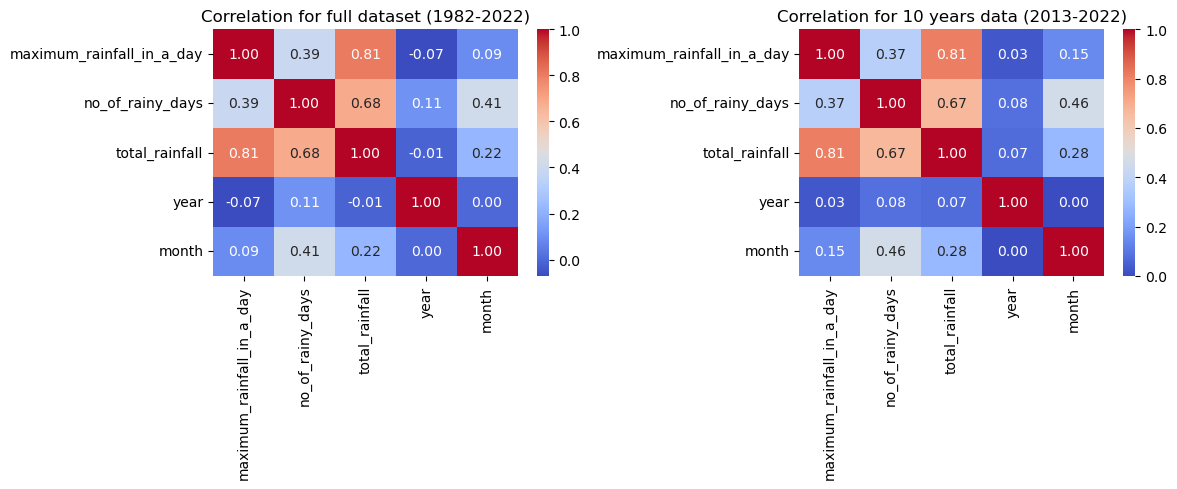

In [40]:
# Correlation on heatmap using full dataset (from 1982 to 2022) and 10 year dataset (2013 to 2022). 
# Noted that both are similar; only the 10 year dataset will be used for further visualisations.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5)) # Configure size and number of subplots 

corr = monthly_data.corr() # Find correlation
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', ax=ax1) # Scale correlation using heatmap
ax1.set_title('Correlation for full dataset (1982-2022)')

corr = data_2013_2022.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', ax=ax2) # Scale correlation using heatmap
ax2.set_title('Correlation for 10 years data (2013-2022)')

plt.tight_layout() # Alignment such that no overlap for subplots

Correlation on heatmap using full dataset (from 1982 to 2022) and 10 year dataset (2013 to 2022). 
Noted that both are similar; only the 10 year dataset will be used for further visualisations

Observed from heatmap:
- Strongest positive correlation found between total rainfall in a month and highest maximum rainfall in a day of the month <br>
- Strong positive correlation of total rainfall in a month compared to number of rainy days in a month.

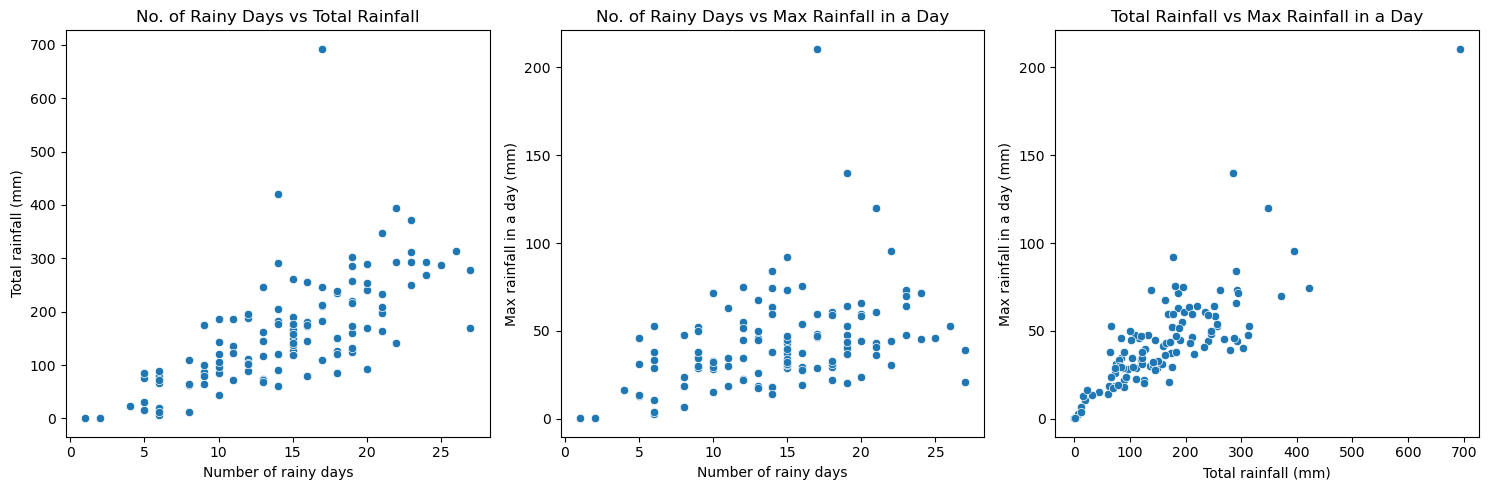

In [41]:
# Scatterplot to view relationship between columns

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5)) # Configure size and number of subplots 

sns.scatterplot(x='no_of_rainy_days', y='total_rainfall', data=data_2013_2022, ax=axs[0])
axs[0].set_xlabel('Number of rainy days')
axs[0].set_ylabel('Total rainfall (mm)')
axs[0].set_title('No. of Rainy Days vs Total Rainfall')

sns.scatterplot(x='no_of_rainy_days', y='maximum_rainfall_in_a_day', data=data_2013_2022, ax=axs[1])
axs[1].set_xlabel('Number of rainy days')
axs[1].set_ylabel('Max rainfall in a day (mm)')
axs[1].set_title('No. of Rainy Days vs Max Rainfall in a Day')

sns.scatterplot(x='total_rainfall', y='maximum_rainfall_in_a_day', data=data_2013_2022, ax=axs[2])
axs[2].set_xlabel('Total rainfall (mm)')
axs[2].set_ylabel('Max rainfall in a day (mm)')
axs[2].set_title('Total Rainfall vs Max Rainfall in a Day')

plt.tight_layout() # Alignment such that no overlap for subplots

Observed from scatterplot:
- Similar to observation from correlation heatmap, strongest positive correlation found between total rainfall in a month and highest maximum rainfall in a day of the month
- Similar to observation from correlation heatmap, positive correlation of total rainfall in a month compared to number of rainy days in a month.
- Outliers present for rainfall volume (total rainfall and maximum rainfall in a day)

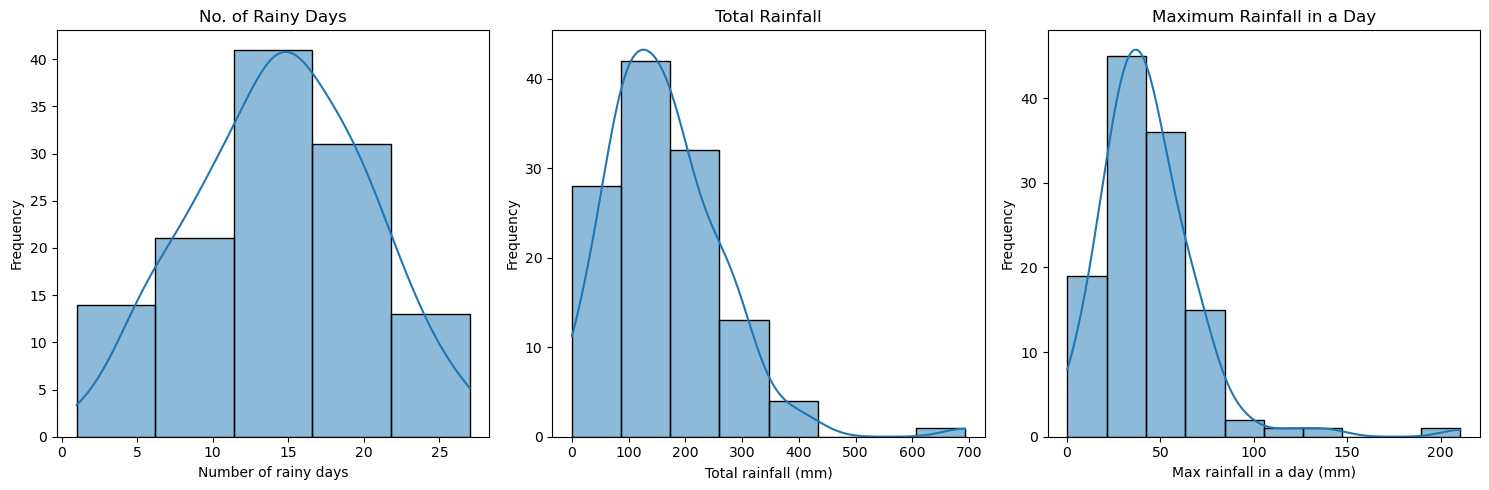

In [42]:
# Histogram distribution

fig, axs = plt.subplots(1, 3, figsize=(15,5)) # Configure size and number of subplots 

sns.histplot(data_2013_2022['no_of_rainy_days'], bins=5, kde = True, ax=axs[0])
axs[0].set_xlabel('Number of rainy days')
axs[0].set_ylabel('Frequency')
axs[0].set_title('No. of Rainy Days')

sns.histplot(data_2013_2022['total_rainfall'], bins=8, kde = True, ax=axs[1])
axs[1].set_xlabel('Total rainfall (mm)')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Total Rainfall')

sns.histplot(data_2013_2022['maximum_rainfall_in_a_day'], bins=10, kde = True, ax=axs[2])
axs[2].set_xlabel('Max rainfall in a day (mm)')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Maximum Rainfall in a Day')

plt.tight_layout() # Alignment such that no overlap for subplots

Observed from histogram:
- Similar to observation from scatterplot, outliers present for rainfall volume (total rainfall and maximum rainfall in a day).
- Distribution for number of rainy days resembles a normal distribution. Distribution for rainfall volumes are right-skewed.

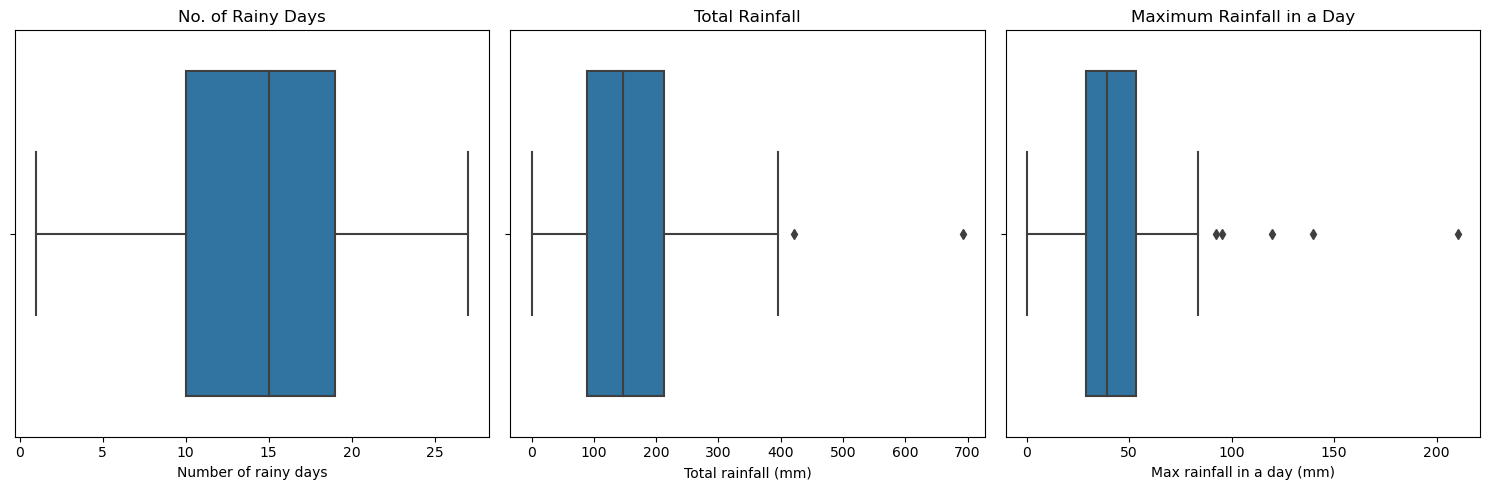

In [43]:
# Boxplot

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5)) # Configure size and number of subplots

sns.boxplot(data=data_2013_2022, x="no_of_rainy_days", ax=ax1)
ax1.set_xlabel('Number of rainy days')
ax1.set_title("No. of Rainy Days")

sns.boxplot(data=data_2013_2022, x="total_rainfall", ax=ax2)
ax2.set_xlabel('Total rainfall (mm)')
ax2.set_title("Total Rainfall")

sns.boxplot(data=data_2013_2022, x="maximum_rainfall_in_a_day", ax=ax3)
ax3.set_xlabel('Max rainfall in a day (mm)')
ax3.set_title("Maximum Rainfall in a Day")

plt.tight_layout() # Alignment such that no overlap for subplots

Observed from boxplot:
- Similar to observation from scatterplot and boxplot, Outliers present for rainfall volume (total rainfall and maximum rainfall in a day).
- 50% of the time (in the Interquartile Range) it rained between 10 and 19 days a month.

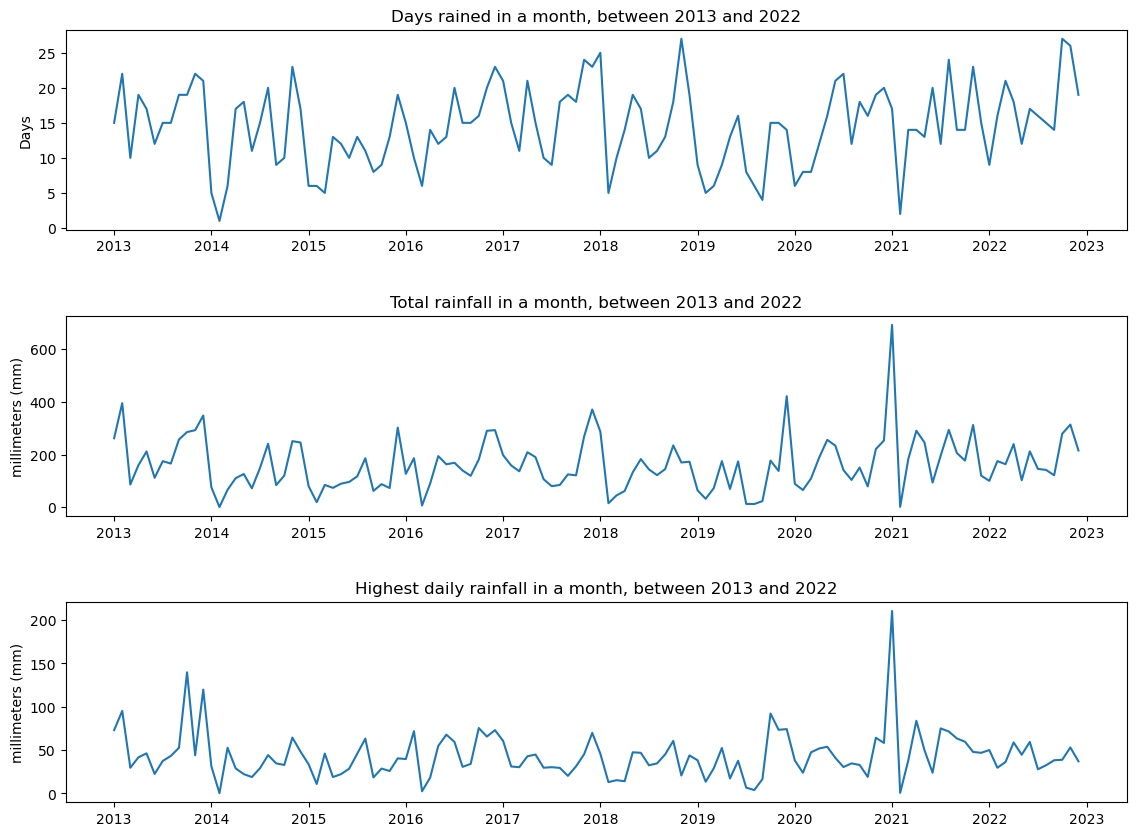

In [44]:
# Line graph of overall trend across each month from 2013 to 2022

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 9)) # Configure size and number of subplots

titles = ['Days rained', 'Total rainfall', 'Highest daily rainfall']
y_labels = ['Days', 'millimeters (mm)', 'millimeters (mm)']
cols = ['no_of_rainy_days', 'total_rainfall', 'maximum_rainfall_in_a_day']

for i in range(3): # Loop through respective column data, title, y-label name for each of 3 lineplots
    sns.lineplot(x='yyyy_mm', y=cols[i], data=data_2013_2022, ax=axs[i])
    axs[i].set_xticks(np.arange(0, len(data_2013_2022)+1, step=12))
    axs[i].set_xticklabels(np.arange(2013, 2023+1, step=1))
    axs[i].set_xlabel('')
    axs[i].set_ylabel(y_labels[i])
    axs[i].set_title(titles[i] + ' in a month, between 2013 and 2022')

plt.tight_layout(pad=3.0) # Alignment such that no overlap for subplots

Observed from line graph of rainfall each month and year between 2013 and 2022:
- Jan 2021 shows abnormally high rainfall

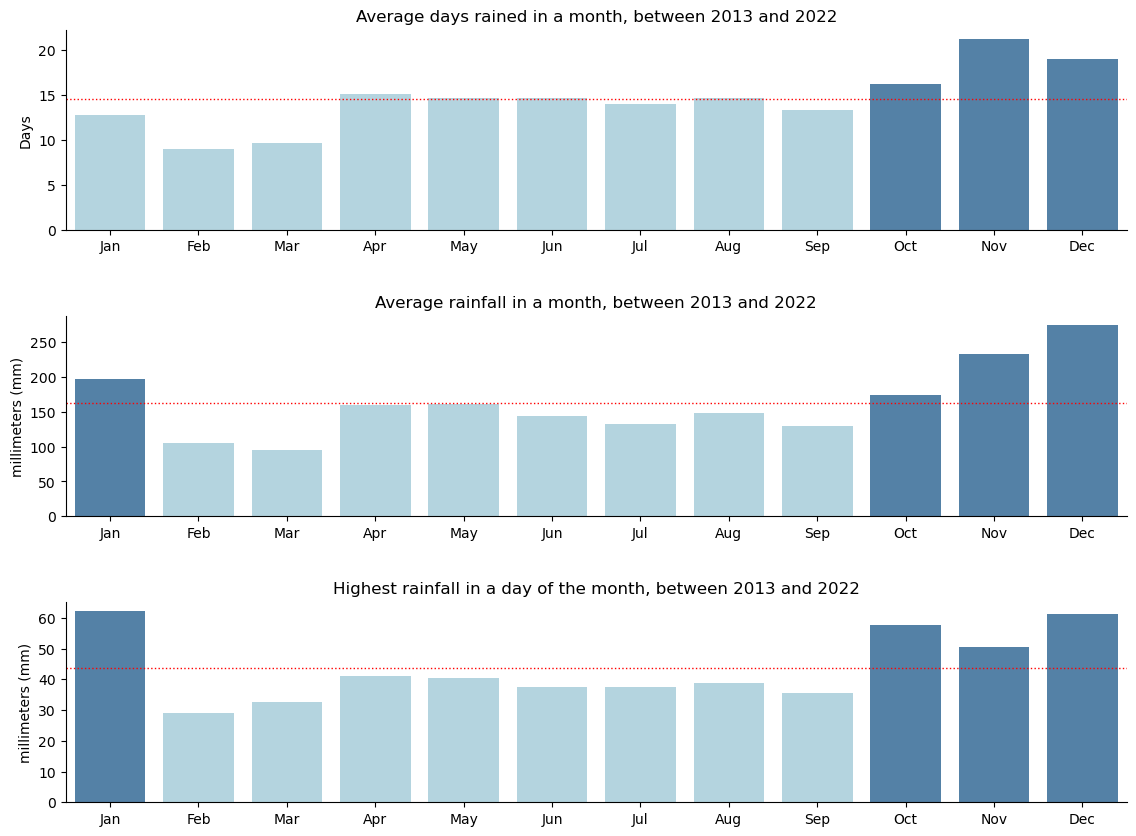

In [45]:
# Bar graph of average over time of the year between 2013 and 2022
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 9)) # Configure size and number of subplots
x_months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
colors = [['lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','steelblue','steelblue','steelblue'],
    ['steelblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','steelblue','steelblue','steelblue'],
    ['steelblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','steelblue','steelblue','steelblue']]

titles = ['Average days rained in a month', 'Average rainfall in a month', 'Highest rainfall in a day of the month']
y_labels = ['Days', 'millimeters (mm)', 'millimeters (mm)']
cols = ['no_of_rainy_days', 'total_rainfall', 'maximum_rainfall_in_a_day']

for i in range(3): # Loop through subplot specific information for each of 3 bar graphs
    mean_value = data_2013_2022[cols[i]].mean() # Compute mean value
    sns.barplot(x='month', y=cols[i], data=data_2013_2022, ci=None, ax=axs[i], palette=colors[i])
    axs[i].axhline(y=mean_value, color='red', linewidth=1, linestyle=':', label='mean') # Plot mean value as line
    axs[i].set_xticks(np.arange(0, 12, step=1), x_months)
    axs[i].set_xlabel('')
    axs[i].set_ylabel(y_labels[i])
    axs[i].set_title(titles[i] + ', between 2013 and 2022')
    axs[i].spines[['top','right']].set_visible(False)

plt.tight_layout(pad=3.0) # Alignment such that no overlap for subplots

Observed from bar graph of rainfall for month of the year between 2013 and 2022: <br>
- Higher than average number of rainy days in October to December. <br>
- Highest rain volume in October to January.

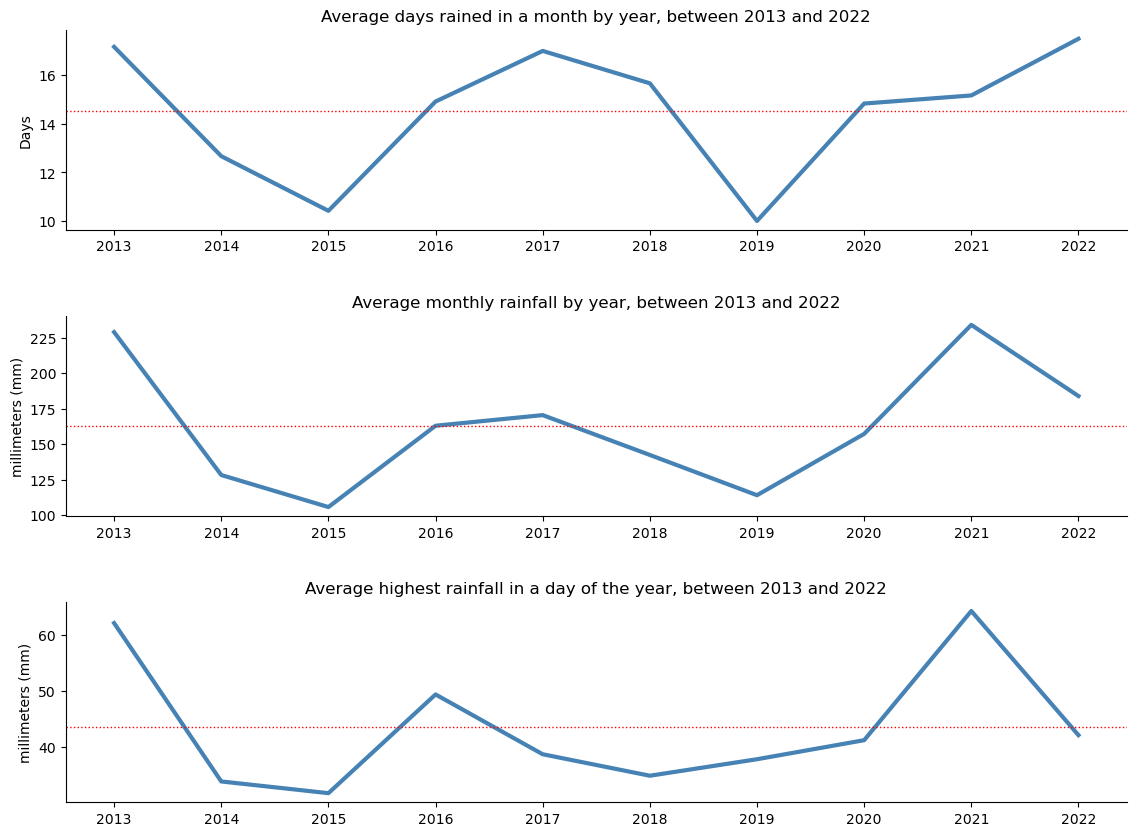

In [46]:
# Line graph of average for each year between 2013 and 2022
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 9)) # Configure size and number of subplots

titles = ['Average days rained in a month by year', 'Average monthly rainfall by year', 'Average highest rainfall in a day of the year']
y_labels = ['Days', 'millimeters (mm)', 'millimeters (mm)']
cols = ['no_of_rainy_days', 'total_rainfall', 'maximum_rainfall_in_a_day']

for i in range(3): # Loop through subplot specific information for each of 3 line graphs
    mean_2013_2022 = data_2013_2022[cols[i]].mean() # Compute mean value
    sns.lineplot(x='year', y=cols[i], data=data_2013_2022, ci=None, linewidth=3, ax=axs[i], color='steelblue')
    axs[i].axhline(y=mean_2013_2022, color='red', linewidth=1, linestyle=':', label='mean') # Plot mean value as line
    axs[i].set_xticks(np.arange(2013, 2023, step=1))
    axs[i].set_xlabel('')
    axs[i].set_ylabel(y_labels[i])
    axs[i].set_title(titles[i] + ', between 2013 and 2022')
    axs[i].spines[['top','right']].set_visible(False)

plt.tight_layout(pad=3.0) # Alignment such that no overlap for subplots

Observed from bar chart of rainfall for years between 2013 and 2022:
- 2021 and 2022 showed higher than average number of days rained in a month.
- 2021 and 2022 showed higher than average monthly rainfall.

**Summary of Findings**
1) From heatmap and scatterplot, noted
* strongest positive correlation found between total rainfall in a month and highest maximum rainfall in a day of the month,
* strong positive correlation of total rainfall in a month compared to number of rainy days in a month

2) From scatterplot, histogram and boxplot, noted that there were outliers. <br>
From line graph of total rainfall in a month and highest daily rainfall in a month, noted that this was in Jan 2021. This is consistent with [NEA report](https://www.nea.gov.sg/media/news/news/index/2021-is-singapore-s-second-wettest-year-since-1980#:~:text=rainfall%20was%20recorded%20in%20January) and [news sources](https://www.straitstimes.com/singapore/wet-and-windy-start-to-the-new-year-continues-into-saturday).

3) From bar graph by month, it rained an average of about 14 days a month (about 50% of the month). The boxplot also indicates that 50% of the time (in the Interquartile Range) it rained between 10 and 19 days a month. 

4) From the bar graph by month, October to December has higher than average number of rainy days, with the highest in November (consistent with earlier findings). October to January has the highest rain volume. <br>
From line graphs by year, 2021 and 2022 showed higher than average rainy days and rain volume. We might expect the same for 2023. The Straits Times reported that La Nina weather phenomenon which caused the wet weather in 2022, [will possibly go into 2023](https://www.straitstimes.com/asia/se-asia/more-rainy-days-ahead-in-singapore-as-two-weather-phenomena-set-to-bring-grey-skies#:~:text=and%20possibly%20even%20into%202023.).

--- 
### Additional rainfall data

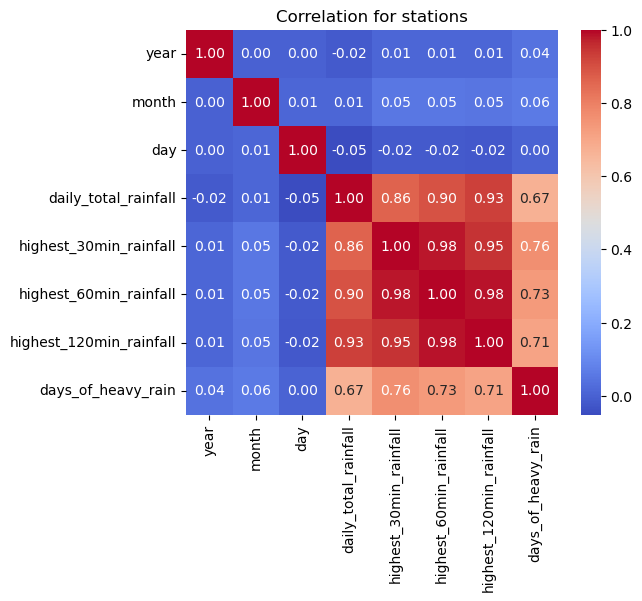

In [47]:
# Heatmap of correlation between columns

fig, ax = plt.subplots(figsize=(6, 5))

corr1 = stations_daily_2021_2022.corr() # Find correlation
sns.heatmap(corr1, annot=True, fmt='.2f', cmap='coolwarm', ax=ax) # Scale correlation using heatmap
ax.set_title('Correlation for stations');

Observed from correlation heatmap
- strongest correlation found between total rainfall in a month and highest rainfall over 30, 60, 120min periods
- strong correlation between total rainfall and days with heavy rain
- strong correlation between highest rainfall over 30, 60, 120min periods and days with heavy rain

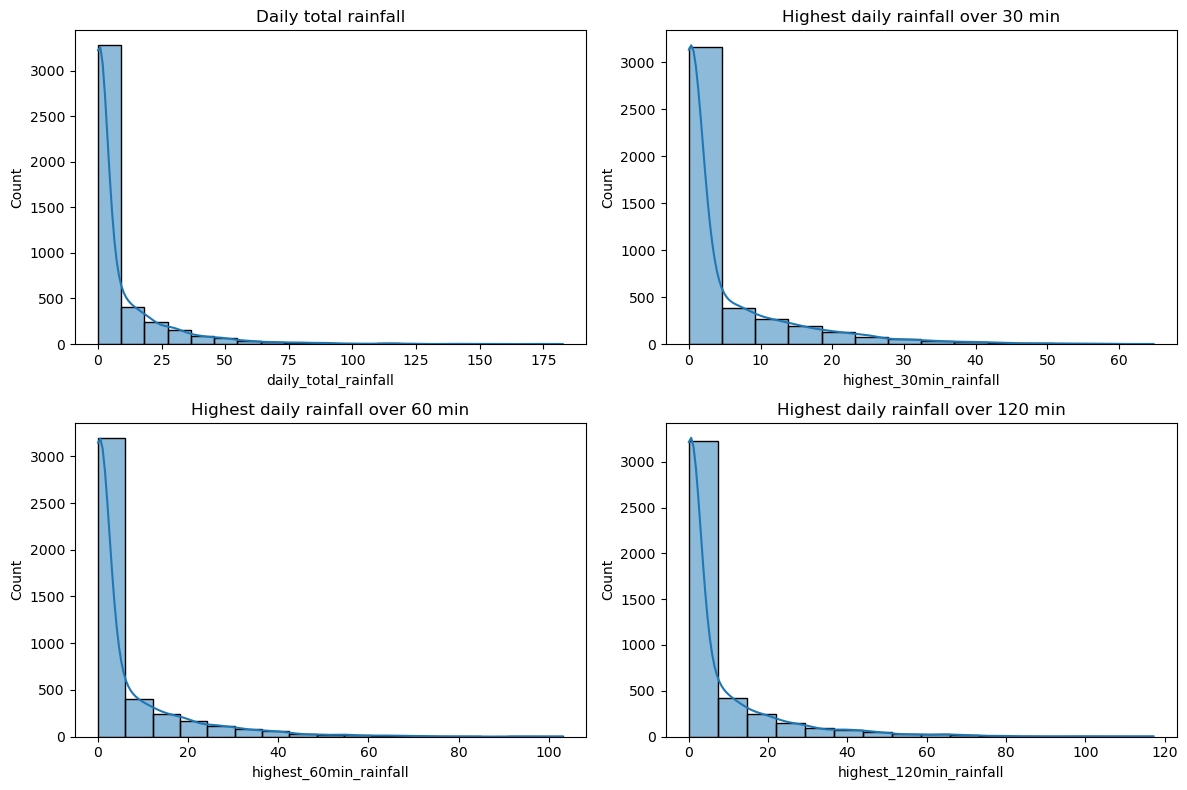

In [48]:
# Histogram distribution

fig, axs = plt.subplots(2, 2, figsize=(12,8))

sns.histplot(stations_daily_2021_2022['daily_total_rainfall'], bins=20, kde = True, ax=axs[0, 0])
ax=axs[0, 0].set_title('Daily total rainfall')

sns.histplot(stations_daily_2021_2022['highest_30min_rainfall'], bins=14, kde = True, ax=axs[0, 1])
ax=axs[0, 1].set_title('Highest daily rainfall over 30 min')

sns.histplot(stations_daily_2021_2022['highest_60min_rainfall'], bins=17, kde = True, ax=axs[1, 0])
ax=axs[1, 0].set_title('Highest daily rainfall over 60 min')

sns.histplot(stations_daily_2021_2022['highest_120min_rainfall'], bins=16, kde = True, ax=axs[1, 1])
ax=axs[1, 1].set_title('Highest daily rainfall over 120 min')

plt.tight_layout()

Observed from histogram:
- exponential distribution for daily rainfall and highest rainfall over periods

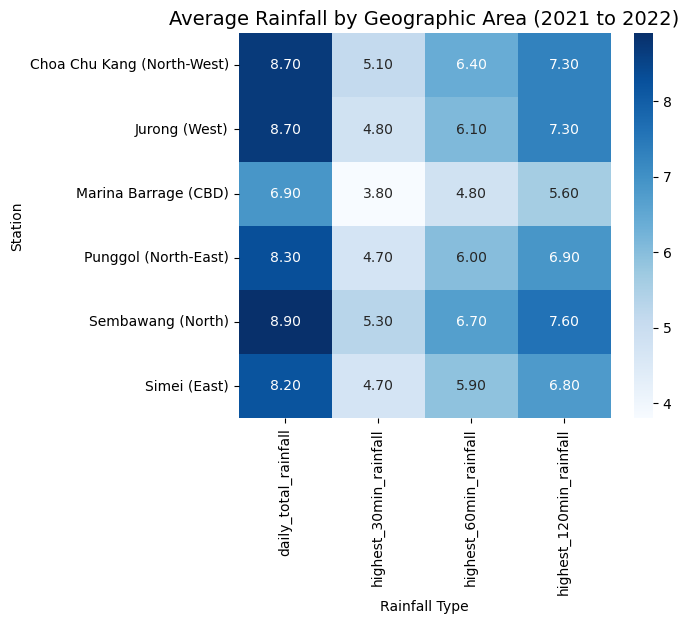

In [49]:
# Heatmap of average rainfall volume

fig, ax = plt.subplots(figsize=(6, 5))

sns.heatmap(station_mean, annot=True, fmt=".2f", cmap='Blues')

plt.title('Average Rainfall by Geographic Area (2021 to 2022)', fontsize=14)
plt.xlabel('Rainfall Type')
plt.ylabel('Station');

Observed from heatmap of average rainfall volume (days in a month) by geographic area (in 2021 and 2022):
- the west, north and north-east has higher rainfall than the east and CBD (south) areas

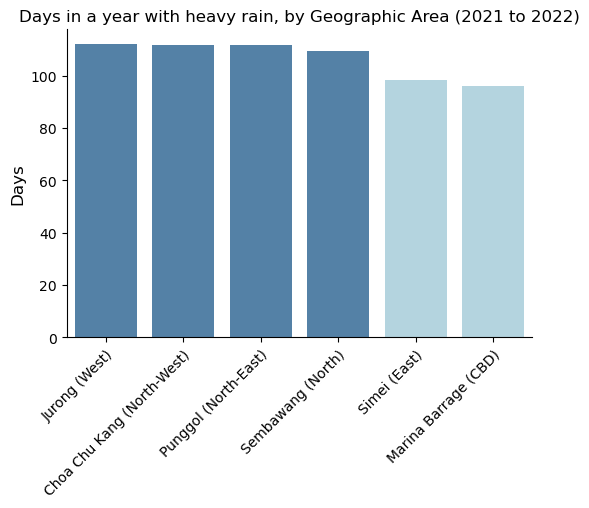

In [50]:
# Bar graph of days in a year with heavy rain by Area 
fig, ax = plt.subplots(figsize=(6, 4))
colors = ['steelblue','steelblue','steelblue','steelblue','lightblue','lightblue']

sns.barplot(x='station', y='days_of_heavy_rain', data=heavy_rainfall, ci=None, palette=colors)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', wrap=True)
plt.xlabel('')
plt.ylabel('Days', fontsize=12)
plt.title('Days in a year with heavy rain, by Geographic Area (2021 to 2022)', fontsize=12)
sns.despine(right=True, top=True); # Remove top and right grid borders

Observed from bar graph of days in a year with heavy rain by geographic area (in 2021 and 2022) similar to earlier heatmap:
- the west, north and north-east has higher rainfall than the east and CBD (south) areas

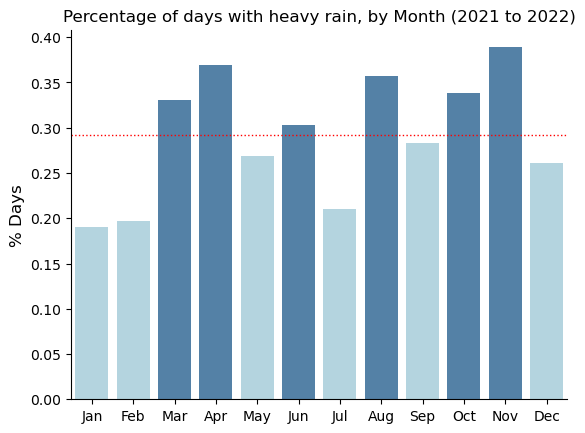

In [51]:
# Bar graph of percentage of days in a year with heavy rain by Month 
mean_heavyrain = stations_daily_2021_2022['days_of_heavy_rain'].mean()
x_months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
colors = ['lightblue','lightblue','steelblue','steelblue','lightblue','steelblue','lightblue','steelblue','lightblue','steelblue','steelblue','lightblue']

sns.barplot(x='month', y='days_of_heavy_rain', data=stations_daily_2021_2022, ci=None, palette=colors)
plt.axhline(y=mean_heavyrain, color='red', linewidth=1, linestyle=':', label='mean')

plt.xticks(np.arange(0, 12, step=1), x_months)
plt.xlabel('')
plt.ylabel('% Days', fontsize=12)
plt.title('Percentage of days with heavy rain, by Month (2021 to 2022)', fontsize=12)
sns.despine(right=True, top=True);

Observed from bar graph of % of days with heavy rain by month (in 2021 and 2022):
- months with higher than average number of days with heavy rain is spread out across the year

**Summary of Findings**
1) From correlation heatmap noted
* strongest correlation found between total rainfall in a month and highest rainfall over 30, 60, 120min periods,
* followed by total rainfall or highest rainfall over periods, and days with heavy rain

2) From histogram noted an exponential distribution for daily rainfall and highest rainfall over periods

3) From heatmap of average rainfall volume by geographic area (in 2021 and 2022), noted that the west, north and north-east has higher rainfall than the east and CBD (south) areas. <br>
From bar chart of heavy rain by area, there was about 15 more days in a year (about 4% of days in a year) with heavy rain in the West / North-west compared to the East / South. This is corroborated with Meteorological Service Singapore (MSS) that ["rainfall is higher over the northern and western parts of Singapore and decreases towards the eastern part of the island"](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=rainfall%20is%20higher%20over%20the%20northern%20and%20western%20parts).

4) From bar chart of heavy rain by month, there was higher than average heavy rain in Mar, Apr, Jun, Aug, Oct and Nov. While earlier it was identified that October to December has higher than average number of rainy days, the months with higher than average number of days with *heavy rain* is more spread out across the year. This is consistent with [MSS description](http://www.weather.gov.sg/climate-climate-of-singapore/) of severe thunderstorms in the Inter-monsoon Periods (Late March-May and October-November) and short thunderstorms in the Southwest Monsoon Season (June-September).

--- 
## Conclusions and Recommendations
--- 

Rain, especially heavy rain may affect food deliveries in Singapore in terms of surge in orders, less delivery riders and delays in deliveries. There are some findings on rainfall in Singapore that can help delivery companies develop strategies to cope with this.

**Summary of findings**
1. On average, it rained an average of about 14 days a month (about 50% of the month). On average, there was heavy rain for 29% of days in a year.
2. As 2022 had higher than average rain volume, we might expect the same for 2023.
3. Singapore has highest rainfall volume in the months of October to January.
4. However, the months with higher than average number of days with heavy rain are more spread out across the year.
5. There are slightly more days of heavy rain in the North, West and North-East compared to the South and East (15 more days or 4% more days in a year).

**Recommendations**

Singapore has high rainfall and just like recent years they might need to expect 2023 to have higher than average rain volume, so food delivery companies should definitely consider rainfall when planning their delivery operations, marketing, pricing.

As higher rainfall volume is expected in October to January, there is likely to be surges in food orders during this period. These companies could hire more delivery riders by increasing recruitment efforts for short-term rider or having better incentives to attract more riders to meet the demand during this period. At the same time, they may not need to have as much marketing efforts to attract more food orders during this period. Budget resources could be allocated from marketing promotions to recruitment or delivery completion incentives.

While these food delivery companies can prepare for the rain in October to January, there are also many other months with  heavy rain throughout the year. As such, it may not be enough to focus on just the year-end period. More sensitive collection of information or detailed algorithms to identify real-time or expected rain durations and intensity may be necessary. These may help decide whether there should be peak charges to balance order demand and supply of riders, or whether they should set longer expected delivery timings when it rains.

There are also residential areas in Singapore which experiences slightly higher number of days with heavy rainfall than others. Delivery companies can take this into consideration when planning their food delivery operations.